In [2]:
import requests
import pandas as pd
import numpy as np 

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)

In [4]:
json = r.json()

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [6]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [8]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,37605,0,0,0,0,0,3,3.4,...,178,98,138,74,3.0,,NaN,,NaN,
1,NaN,None,39476,0,0,0,0,0,2,3.1,...,229,66,239,75,NaN,,NaN,,NaN,
2,50.0,None,41270,0,0,0,0,0,2,1.8,...,164,32,133,35,NaN,,2.0,,NaN,
3,NaN,None,54694,0,0,0,0,0,3,5.0,...,9,3,11,7,NaN,,4.0,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,3.1,...,228,65,207,60,NaN,,NaN,,NaN,


In [9]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [10]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [11]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,1.7,70,1439,0,7.6,53
1,Papastathopoulos,1,2,0.4,50,1696,0,11.4,57
2,Luiz Moreira Marinho,1,2,2.6,55,2809,0,17.1,94
3,Aubameyang,1,3,45.2,120,3136,0,17.1,205
4,Soares,1,2,0.6,50,1553,0,12.2,61


In [12]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [13]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,3,1.7,70,1439,0,7.6,53,Midfielder
1,Papastathopoulos,1,2,0.4,50,1696,0,11.4,57,Defender
2,Luiz Moreira Marinho,1,2,2.6,55,2809,0,17.1,94,Defender
3,Aubameyang,1,3,45.2,120,3136,0,17.1,205,Midfielder
4,Soares,1,2,0.6,50,1553,0,12.2,61,Defender


In [14]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [15]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3,1.7,70,1439,0,7.6,53,Midfielder
1,Papastathopoulos,Arsenal,2,0.4,50,1696,0,11.4,57,Defender
2,Luiz Moreira Marinho,Arsenal,2,2.6,55,2809,0,17.1,94,Defender
3,Aubameyang,Arsenal,3,45.2,120,3136,0,17.1,205,Midfielder
4,Soares,Arsenal,2,0.6,50,1553,0,12.2,61,Defender


In [16]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

In [17]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
100,Pope,Burnley,1,20.2,55,3420,0,30.9,170,Goalkeeper,30.9
73,Ryan,Brighton,1,20.9,45,3420,0,30.0,135,Goalkeeper,30.0
322,Henderson,Man Utd,1,3.9,55,3240,0,29.1,160,Goalkeeper,29.1
344,Dubravka,Newcastle,1,0.8,50,3420,0,28.6,143,Goalkeeper,28.6
209,Schmeichel,Leicester,1,13.8,55,3420,0,28.4,156,Goalkeeper,28.4
276,Alexander-Arnold,Liverpool,2,54.7,75,3173,0,28.0,210,Defender,28.0
491,dos Santos Patrício,Wolves,1,6.8,55,3420,0,27.8,153,Goalkeeper,27.8
438,Doherty,Spurs,2,26.3,60,2836,0,27.8,167,Defender,27.8
135,Guaita,Crystal Palace,1,1.6,50,3150,0,27.4,137,Goalkeeper,27.4
267,van Dijk,Liverpool,2,25.9,65,3420,0,27.4,178,Defender,27.4


In [19]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,9.212903
1,Forward,9.221538
2,Goalkeeper,9.496078
3,Midfielder,8.862264


In [20]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [21]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [22]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,15.622581
0,Defender,12.417391
1,Forward,11.752941
3,Midfielder,11.318072


In [23]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [24]:
team_pivot.sort_values('value',ascending=False)


,team,value
12,Sheffield Utd,15.588889
3,Burnley,15.283333
17,Wolves,14.544444
7,Leicester,13.520000
8,Liverpool,13.456522
9,Man City,12.800000
13,Southampton,12.160000
2,Brighton,12.134783
11,Newcastle,11.848148
4,Chelsea,11.808696


In [25]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

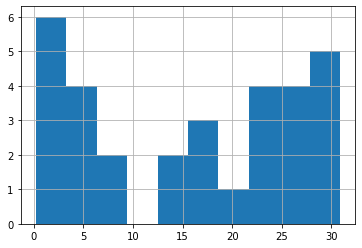

In [26]:
goal_df.value.hist()

In [27]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
100,Pope,Burnley,1,20.2,55,3420,0,30.9,170,Goalkeeper,30.9
73,Ryan,Brighton,1,20.9,45,3420,0,30.0,135,Goalkeeper,30.0
322,Henderson,Man Utd,1,3.9,55,3240,0,29.1,160,Goalkeeper,29.1
344,Dubravka,Newcastle,1,0.8,50,3420,0,28.6,143,Goalkeeper,28.6
209,Schmeichel,Leicester,1,13.8,55,3420,0,28.4,156,Goalkeeper,28.4
491,dos Santos Patrício,Wolves,1,6.8,55,3420,0,27.8,153,Goalkeeper,27.8
135,Guaita,Crystal Palace,1,1.6,50,3150,0,27.4,137,Goalkeeper,27.4
308,de Gea,Man Utd,1,4.2,55,3420,0,26.0,143,Goalkeeper,26.0
388,Ramsdale,Sheffield Utd,1,8.1,50,3330,0,25.2,126,Goalkeeper,25.2
166,Pickford,Everton,1,4.5,50,3420,0,23.4,117,Goalkeeper,23.4


<AxesSubplot:>

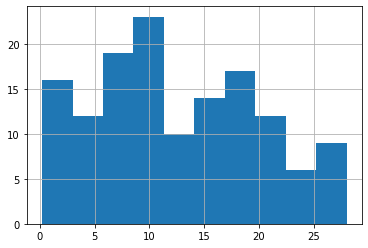

In [28]:
def_df.value.hist()

In [29]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
276,Alexander-Arnold,Liverpool,2,54.7,75,3173,0,28.0,210,Defender,28.0
438,Doherty,Spurs,2,26.3,60,2836,0,27.8,167,Defender,27.8
267,van Dijk,Liverpool,2,25.9,65,3420,0,27.4,178,Defender,27.4
379,Egan,Sheffield Utd,2,17.4,50,3187,0,26.6,133,Defender,26.6
85,Tarkowski,Burnley,2,7.1,55,3420,0,26.0,143,Defender,26.0
272,Robertson,Liverpool,2,13.0,70,3111,0,25.9,181,Defender,25.9
377,Baldock,Sheffield Utd,2,5.5,55,3420,0,25.8,142,Defender,25.8
373,Stevens,Sheffield Utd,2,6.0,55,3345,0,25.8,142,Defender,25.8
65,Dunk,Brighton,2,9.9,50,3230,0,25.6,128,Defender,25.6
371,Basham,Sheffield Utd,2,2.5,50,3242,0,24.6,123,Defender,24.6


<AxesSubplot:>

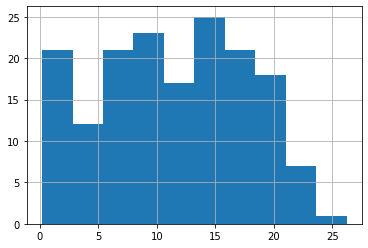

In [30]:
mid_df.value.hist()

In [31]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
381,Lundstram,Sheffield Utd,3,13.6,55,2452,0,26.2,144,Midfielder,26.2
289,De Bruyne,Man City,3,30.2,115,2790,0,21.8,251,Midfielder,21.8
93,Westwood,Burnley,3,1.2,55,3150,0,21.5,118,Midfielder,21.5
39,Grealish,Aston Villa,3,11.7,70,3233,0,21.3,149,Midfielder,21.3
261,Henderson,Liverpool,3,5.0,55,2234,0,21.1,116,Midfielder,21.1
484,Rice,West Ham,3,5.3,50,3420,0,21.0,105,Midfielder,21.0
27,Borges Da Silva,Arsenal,3,8.4,80,2595,0,21.0,168,Midfielder,21.0
464,Noble,West Ham,3,2.3,50,2675,0,21.0,105,Midfielder,21.0
292,Mahrez,Man City,3,2.2,85,1934,0,20.6,175,Midfielder,20.6
104,McNeil,Burnley,3,1.1,60,3339,0,20.5,123,Midfielder,20.5


<AxesSubplot:>

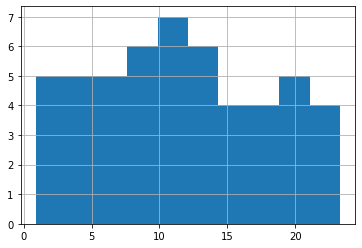

In [32]:
fwd_df.value.hist()

In [33]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
397,Ings,Southampton,4,25.4,85,2800,0,23.3,198,Forward,23.3
495,Jiménez,Wolves,4,19.2,85,3241,0,22.8,194,Forward,22.8
320,Martial,Man Utd,4,14.9,90,2625,0,22.2,200,Forward,22.2
147,Ayew,Crystal Palace,4,7.3,60,3148,0,22.0,132,Forward,22.0
216,Vardy,Leicester,4,17.5,100,3032,0,21.0,210,Forward,21.0
95,Wood,Burnley,4,3.0,65,2436,0,20.9,136,Forward,20.9
175,de Andrade,Everton,4,10.9,80,3070,0,20.6,165,Forward,20.6
122,Abraham,Chelsea,4,6.1,75,2206,0,20.4,153,Forward,20.4
71,Maupay,Brighton,4,2.0,65,2763,0,20.2,131,Forward,20.2
173,Calvert-Lewin,Everton,4,6.5,70,2621,0,18.0,126,Forward,18.0
